| Model | Accuracy | Precision | Recall | F1 Score | ROC-AUC | PR-AUC | RMSE |
|-------|----------|-----------|--------|----------|---------|--------|------|
| XGBoost | 95.20% | 19.44% | 24.14% | 21.54% | 0.9193 | 0.1784 | - |
| Baseline GCN | 80.63% | 17.61% | 65.41% | 27.75% | 0.8271 | 0.3676 | 0.4401 |
| GCN with pseudo-labelling | 84.39% | 14.33% | 42.77% | 21.47% | 0.7699 | 0.1174 | 0.3950 |
| GCN with pseudo-labelling and maintain class ratio | 78.95% | 14.51% | 62.42% | 23.55% | 0.8112 | 0.1838 | 0.4588 |
| GCN with pseudo-labelling and validation gating | 82.35% | 16.70% | 59.75% | 26.11% | 0.8198 | 0.2048 | 0.4201 |
| Sequential Fine-tuned GCN | 81.95% | 17.58% | 54.01% | 24.48% | 0.7890 | 0.2763 | - |
| **GCN Filtered Timesteps (Exp 5, POOLED Test Set)** | **89.61%** | **49.12%** | **59.39%** | **53.77%** | **0.8585** | - | - |

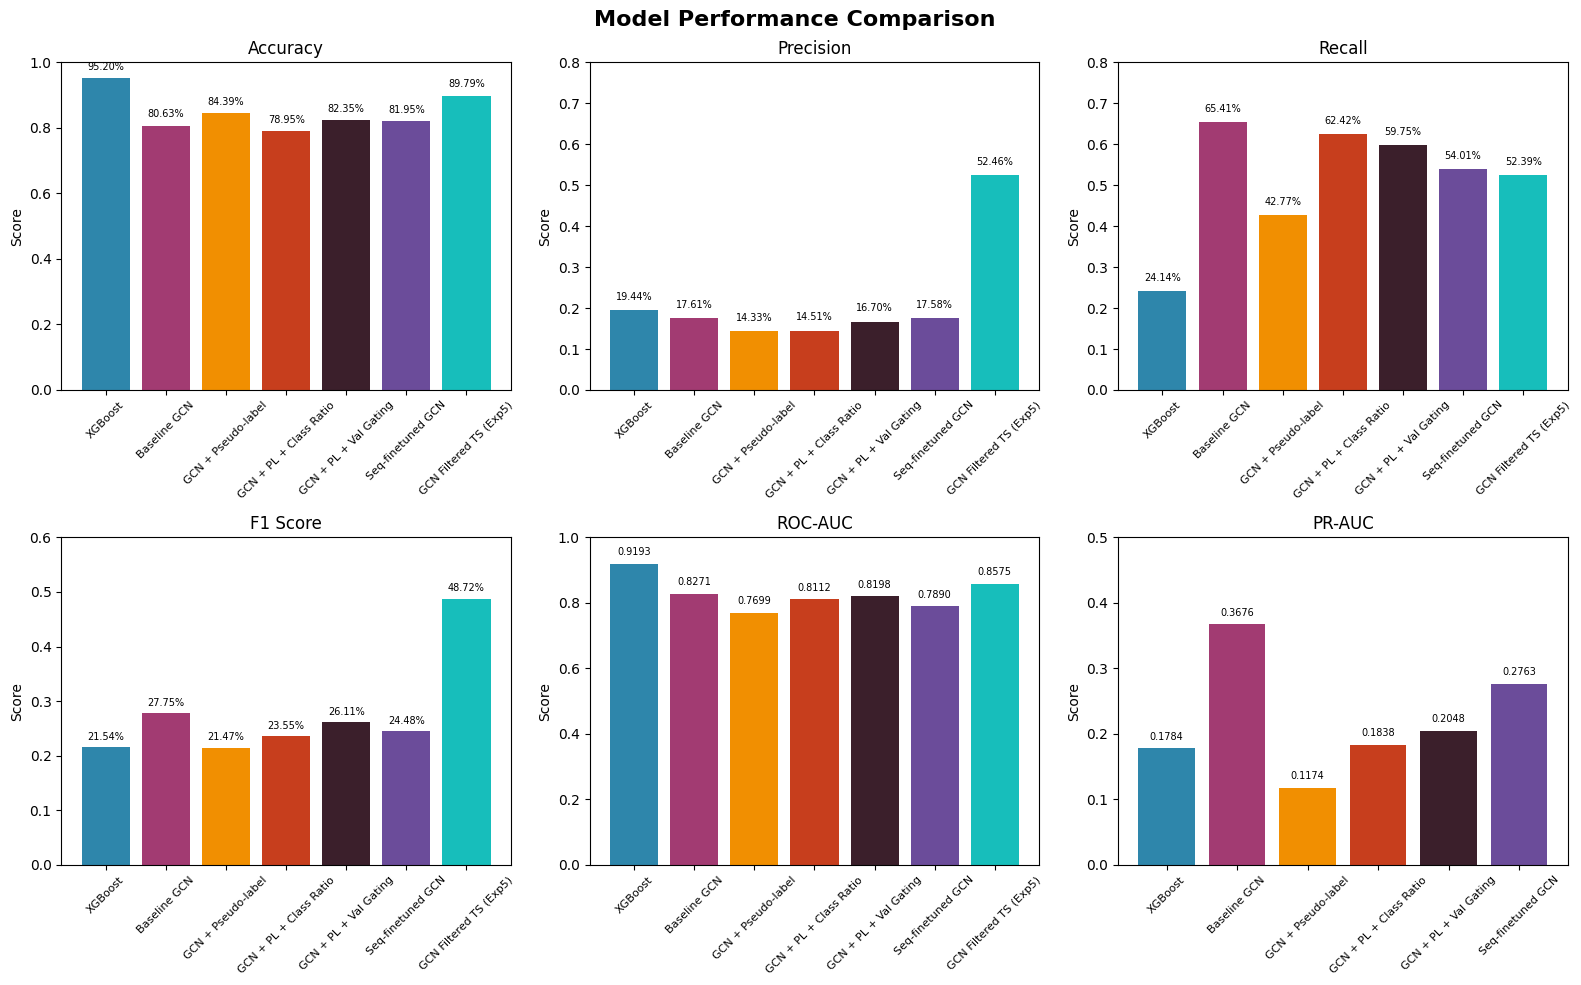

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Model names (shortened for display)
models = [
    'XGBoost',
    'Baseline GCN',
    'GCN + Pseudo-label',
    'GCN + PL + Class Ratio',
    'GCN + PL + Val Gating',
    'Seq-finetuned GCN',
    'GCN Filtered TS (Exp5)'
]

# Performance metrics (converted to decimals)
accuracy = [0.9520, 0.8063, 0.8439, 0.7895, 0.8235, 0.8195, 0.8979]
precision = [0.1944, 0.1761, 0.1433, 0.1451, 0.1670, 0.1758, 0.5246]
recall = [0.2414, 0.6541, 0.4277, 0.6242, 0.5975, 0.5401, 0.5239]
f1_score = [0.2154, 0.2775, 0.2147, 0.2355, 0.2611, 0.2448, 0.4872]
roc_auc = [0.9193, 0.8271, 0.7699, 0.8112, 0.8198, 0.7890, 0.8575]
pr_auc = [0.1784, 0.3676, 0.1174, 0.1838, 0.2048, 0.2763, np.nan]

# Set up the figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Color palette
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3B1F2B', '#6B4C9A', '#17BEBB']

# Plot 1: Accuracy
ax1 = axes[0, 0]
bars1 = ax1.bar(models, accuracy, color=colors)
ax1.set_ylabel('Score')
ax1.set_title('Accuracy')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='x', rotation=45, labelsize=8)
for bar, val in zip(bars1, accuracy):
    if not np.isnan(val):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f'{val:.2%}', ha='center', va='bottom', fontsize=7)

# Plot 2: Precision
ax2 = axes[0, 1]
bars2 = ax2.bar(models, precision, color=colors)
ax2.set_ylabel('Score')
ax2.set_title('Precision')
ax2.set_ylim(0, 0.8)
ax2.tick_params(axis='x', rotation=45, labelsize=8)
for bar, val in zip(bars2, precision):
    if not np.isnan(val):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f'{val:.2%}', ha='center', va='bottom', fontsize=7)

# Plot 3: Recall
ax3 = axes[0, 2]
bars3 = ax3.bar(models, recall, color=colors)
ax3.set_ylabel('Score')
ax3.set_title('Recall')
ax3.set_ylim(0, 0.8)
ax3.tick_params(axis='x', rotation=45, labelsize=8)
for bar, val in zip(bars3, recall):
    if not np.isnan(val):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f'{val:.2%}', ha='center', va='bottom', fontsize=7)

# Plot 4: F1 Score
ax4 = axes[1, 0]
bars4 = ax4.bar(models, f1_score, color=colors)
ax4.set_ylabel('Score')
ax4.set_title('F1 Score')
ax4.set_ylim(0, 0.6)
ax4.tick_params(axis='x', rotation=45, labelsize=8)
for bar, val in zip(bars4, f1_score):
    if not np.isnan(val):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{val:.2%}', ha='center', va='bottom', fontsize=7)

# Plot 5: ROC-AUC
ax5 = axes[1, 1]
bars5 = ax5.bar(models, roc_auc, color=colors)
ax5.set_ylabel('Score')
ax5.set_title('ROC-AUC')
ax5.set_ylim(0, 1)
ax5.tick_params(axis='x', rotation=45, labelsize=8)
for bar, val in zip(bars5, roc_auc):
    if not np.isnan(val):
        ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f'{val:.4f}', ha='center', va='bottom', fontsize=7)

# Plot 6: PR-AUC
ax6 = axes[1, 2]
bars6 = ax6.bar(models, pr_auc, color=colors)
ax6.set_ylabel('Score')
ax6.set_title('PR-AUC')
ax6.set_ylim(0, 0.5)
ax6.tick_params(axis='x', rotation=45, labelsize=8)
for bar, val in zip(bars6, pr_auc):
    if not np.isnan(val):
        ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{val:.4f}', ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.show()